In [1]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle as pkl
import numpy as np

In [2]:
ls -li

total 17916
42087377 -rw-r--r--  1 fernando fernando  6779987 Apr 25 18:32 analysis_Rhythmic_LFP.ipynb
42088716 -rw-rw-r--  1 fernando fernando    96650 Apr 25 18:31 LFPTimeSeries.png
42090572 -rw-rw-r--  1 fernando fernando    11834 Apr 14 16:29 matrix_numConn.json
42339223 drwxrwxr-x  3 fernando fernando     4096 Apr 25 19:19 v7_batch1/
42090566 -rw-rw-r--  1 fernando fernando 11330324 Apr 14 10:29 v7_batch1_0_0__5raster_S1TH.png
42090575 -rw-rw-r--  1 fernando fernando    94314 Apr 14 16:29 v7_batch1_plot_conn_pop_numConns_matrix.png
42339067 drwxrwxr-x  3 fernando fernando     4096 Apr 25 17:58 v7_batch2/
42087763 drwxr-xr-x 22 fernando fernando     4096 Apr 22 17:12 v7_NonRhythmic/
42088848 drwxrwxr-x 22 fernando fernando     4096 Apr 22 17:13 v7_Rhythmic/
42090213 drwxrwxr-x 12 fernando fernando     4096 Apr 22 15:53 v7_SinglePulse/



Start time:  2025-04-25 19:39:30.041255
Loading file v7_batch1/v7_batch1_0_0_data.pkl ... 
  Done; file loading time = 2.09 s
Loading simConfig...
Loading netParams...
Loading net...
  Created 2400 cells
  Created 0 connections
  Created 18164 stims
  Done; re-instantiate net time = 0.11 s
Loading simData...
Recording 0 traces of 0 types on node 0
Preparing spike data...
Plotting spike frequency...
Preparing spike data...


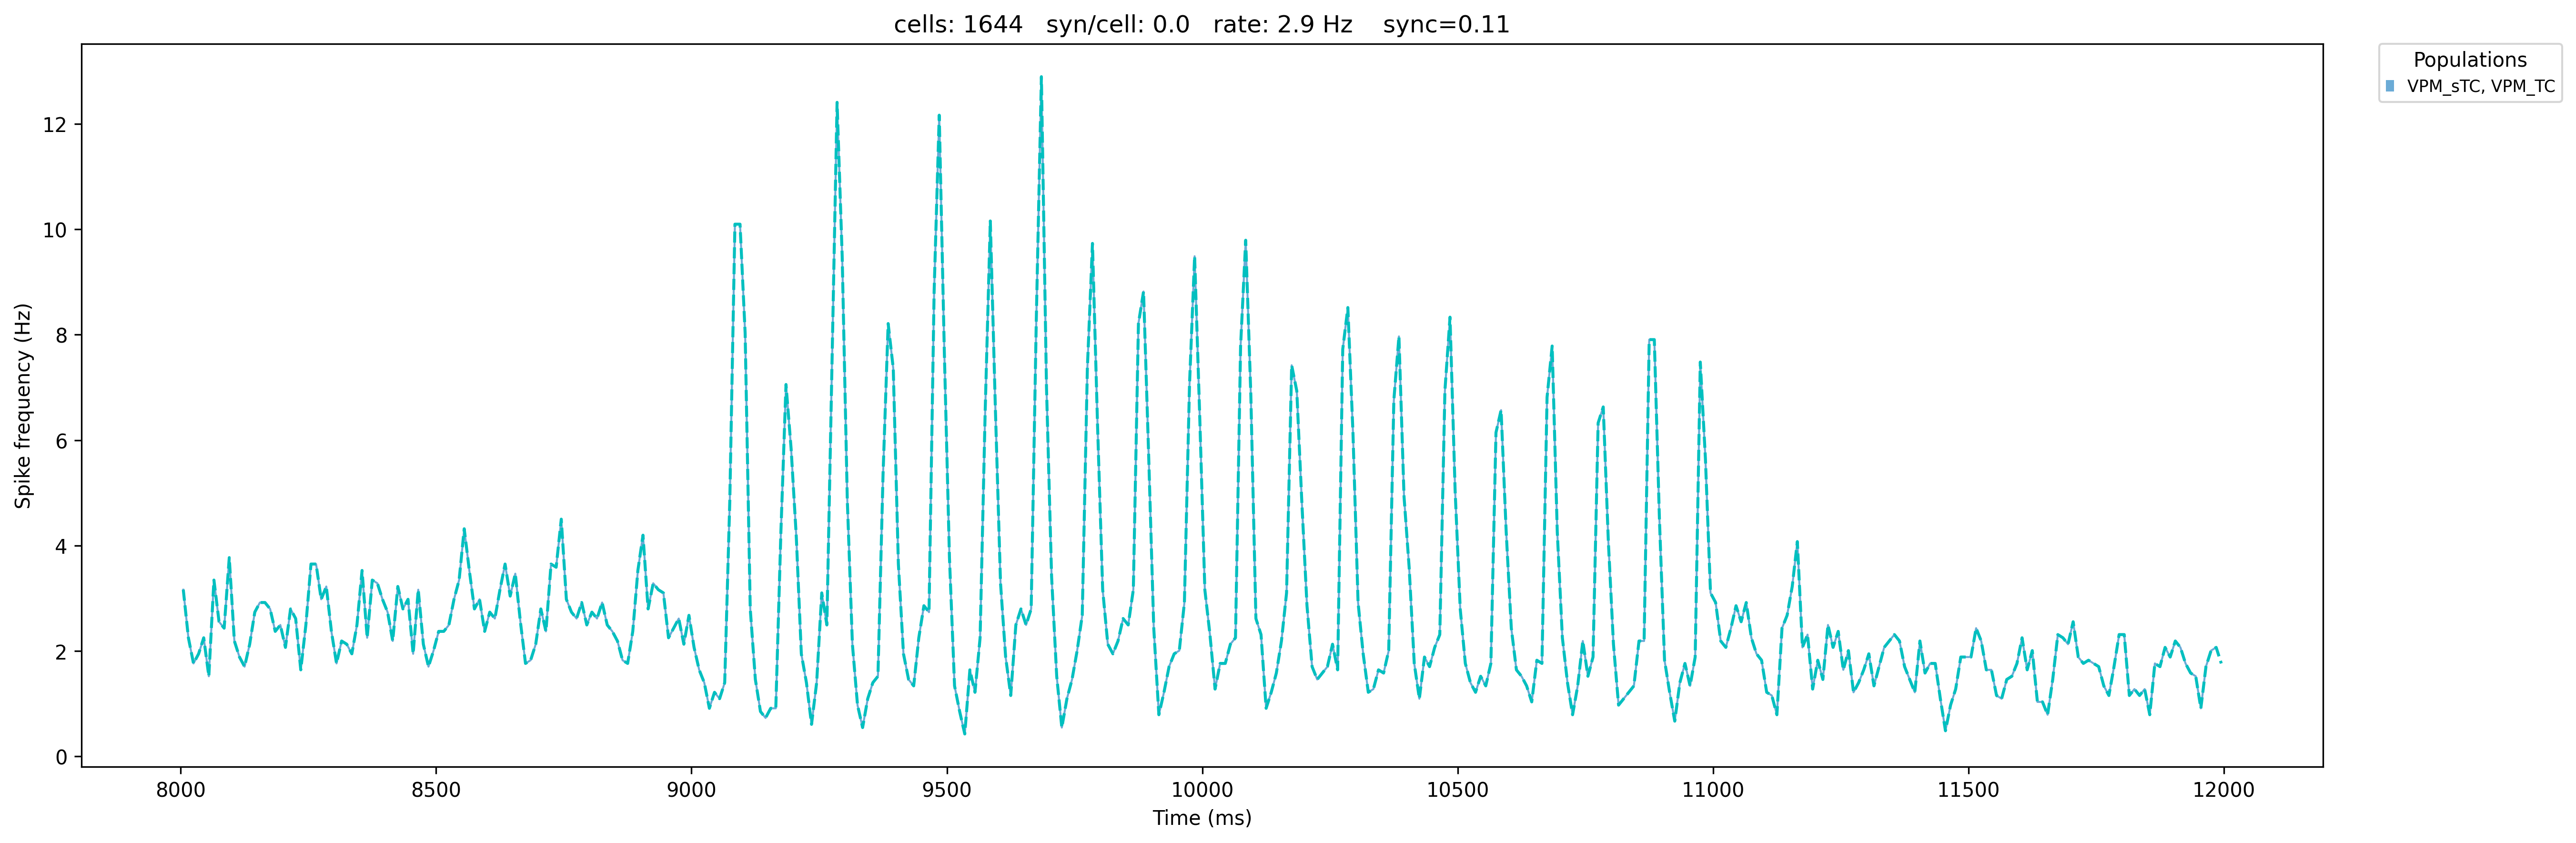

In [3]:
FR_TC = []
vl = []

for ib in range(1,2):

    filename = 'v7_batch'+str(ib)  + '/' +'v7_batch'+str(ib) + '_0_0_data.pkl'

    sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


    timeRange = [8000,12000]  # 'VPM_TC','ss_RTN_m', 
    binSize = 10
    sim.analysis.plotSpikeHist(include=[['VPM_sTC', 'VPM_TC']], binSize=binSize, figSize=(18, 6.0), fontSize = 12, legend=False, showFig= False,
                                        timeRange = timeRange, graphType = 'bar', measure = 'rate', linewidth=5, dpi=300, saveData=False, saveFig=False);

    SpikeHist = sim.analysis.prepareSpikeHist(include=[['VPM_sTC', 'VPM_TC']], timeRange = timeRange)
    aa, bb, = np.histogram(SpikeHist['spkTimes'],bins=range(timeRange[0],timeRange[1]+1,binSize))
    timefactor = binSize*1644/(1000)
    plt.plot(bb[1:]-binSize/2, aa/timefactor, 'c--')
    plt.show()
    FR_TC.append(aa/timefactor)

    for val in sim.cfg.IClamp[2:]:
        vl.append(val['start'])
    # sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
    #                         'timeRange': timeRange, 'figSize': (8,4), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
    
    # for pop in ['VPM_sTC', 'VPM_TC','ss_RTN_m']:
    #     sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-90,65], subtitles= True, axis=True, scaleBarLoc=1, 
    #                         figSize=(12, 4), fontSize=8, showFig=False, saveFig=False);

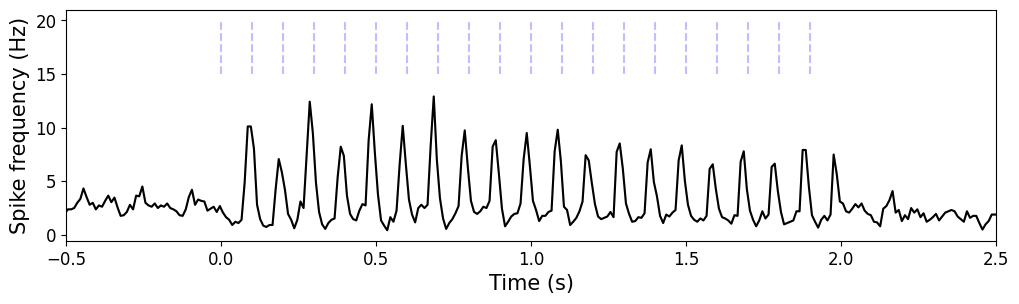

In [4]:
plt.figure(figsize=(12,3))
for i in range(1):
    plt.plot((bb[1:]-9000-binSize/2)/1000, FR_TC[i],'gray', alpha =0.25)
plt.plot((bb[1:]-9000-binSize/2)/1000, np.mean(FR_TC, axis=0),'k')
plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.5,2.5)
plt.vlines((np.array(vl)-9000)/1000, ymin=15,ymax = 20, color='blue', linestyles='dashed', alpha =0.25)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.xticks(size= 12);

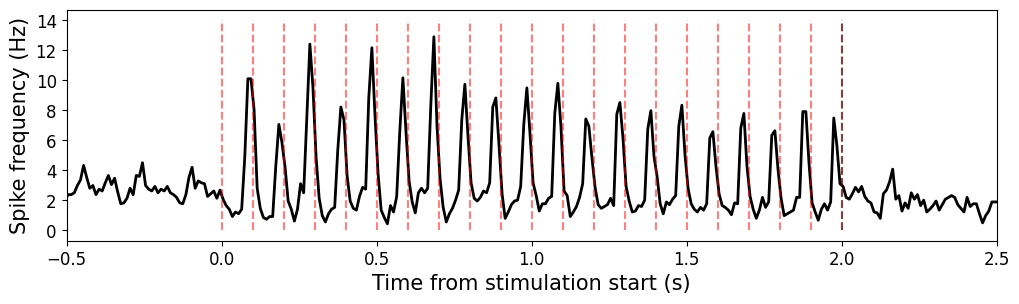

In [5]:
mean = np.mean(FR_TC, axis=0) # Calculate mean across series (axis 0)
std_dev = np.std(FR_TC, axis=0) # Calculate standard deviation across series (axis 0)
x = (bb[1:]-9000-binSize/2)/1000

plt.figure(figsize=(12,3))

# Plot the mean line
plt.plot(x, mean, label='Mean', color='black', linewidth=2)
plt.fill_between(x, mean - std_dev, mean + std_dev, color='gray', alpha=0.5, label='Mean ± 1 Std Dev')

plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time from stimulation start (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.5,2.5)
plt.vlines(np.linspace(0,2.0,21), ymin=0,ymax = 14, color='red',linestyles='dashed', alpha =0.5)
plt.plot([2.0,2.0], [0,14],'--k', alpha =0.5)
plt.xticks(size= 12);


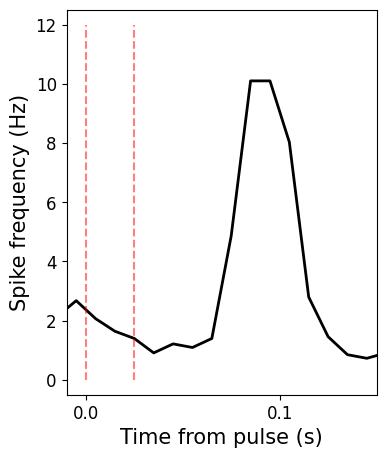

In [6]:
mean = np.mean(FR_TC, axis=0) # Calculate mean across series (axis 0)
std_dev = np.std(FR_TC, axis=0) # Calculate standard deviation across series (axis 0)
x = (bb[1:]-9000-binSize/2)/1000

plt.figure(figsize=(4,5))

# Plot the mean line
plt.plot(x, mean, label='Mean', color='black', linewidth=2)
plt.fill_between(x, mean - 2*std_dev, mean + 2*std_dev, color='gray', alpha=0.5, label='Mean ± 1 Std Dev')

plt.ylabel('Spike frequency (Hz)', size= 15)
plt.xlabel('Time from pulse (s)', size= 15)
plt.yticks(size= 12)
plt.xlim(-0.01,0.15)
# plt.vlines((np.array(vl)-9000)/1000, ymin=10,ymax = 15, color='blue', linestyles='dashed', alpha =0.25)
plt.vlines(np.linspace(0,0.025,2), ymin=0,ymax = 12, color='red',linestyles='dashed', alpha =0.5)
# plt.plot([2.0,2.0], [0,20],'--k')
plt.ylim(-0.5,12.5)
plt.xticks([0,0.10],size= 12);


Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace


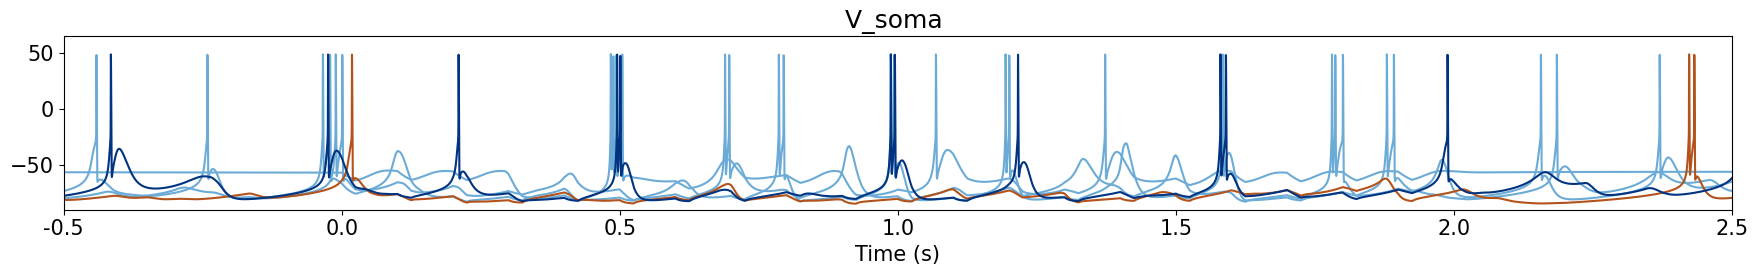

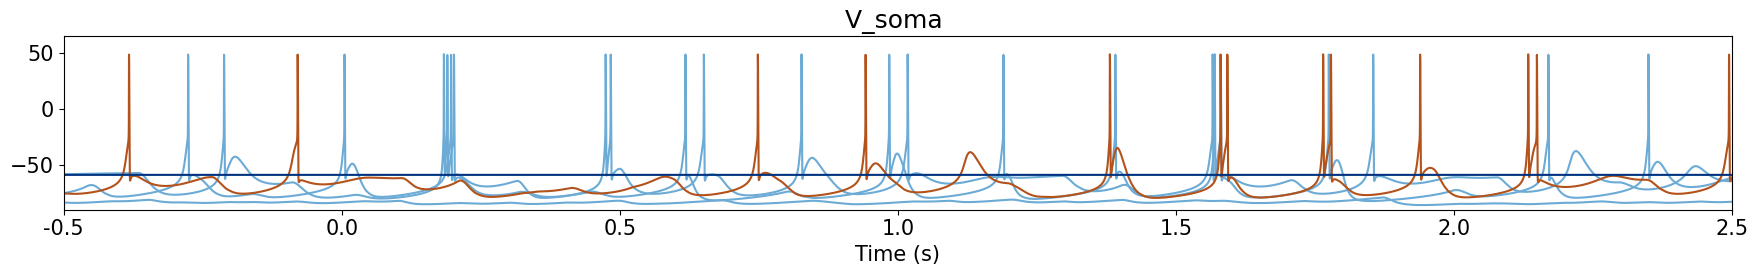

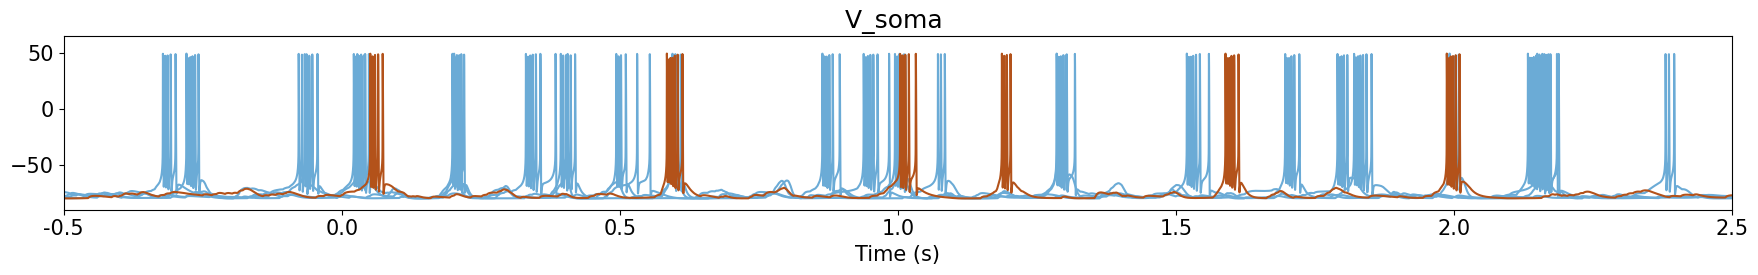

In [7]:
for pop in ['VPM_sTC', 'VPM_TC','ss_RTN_m']:
        sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-90,65], subtitles= True, axis=True, scaleBarLoc=1, 
                            figSize=(18, 3), fontSize=15, showFig=False, saveFig=False);
        plt.xlim(8500,11500)
        plt.xlabel('Time (s)')
        plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));

Preparing spike data...
Plotting raster...


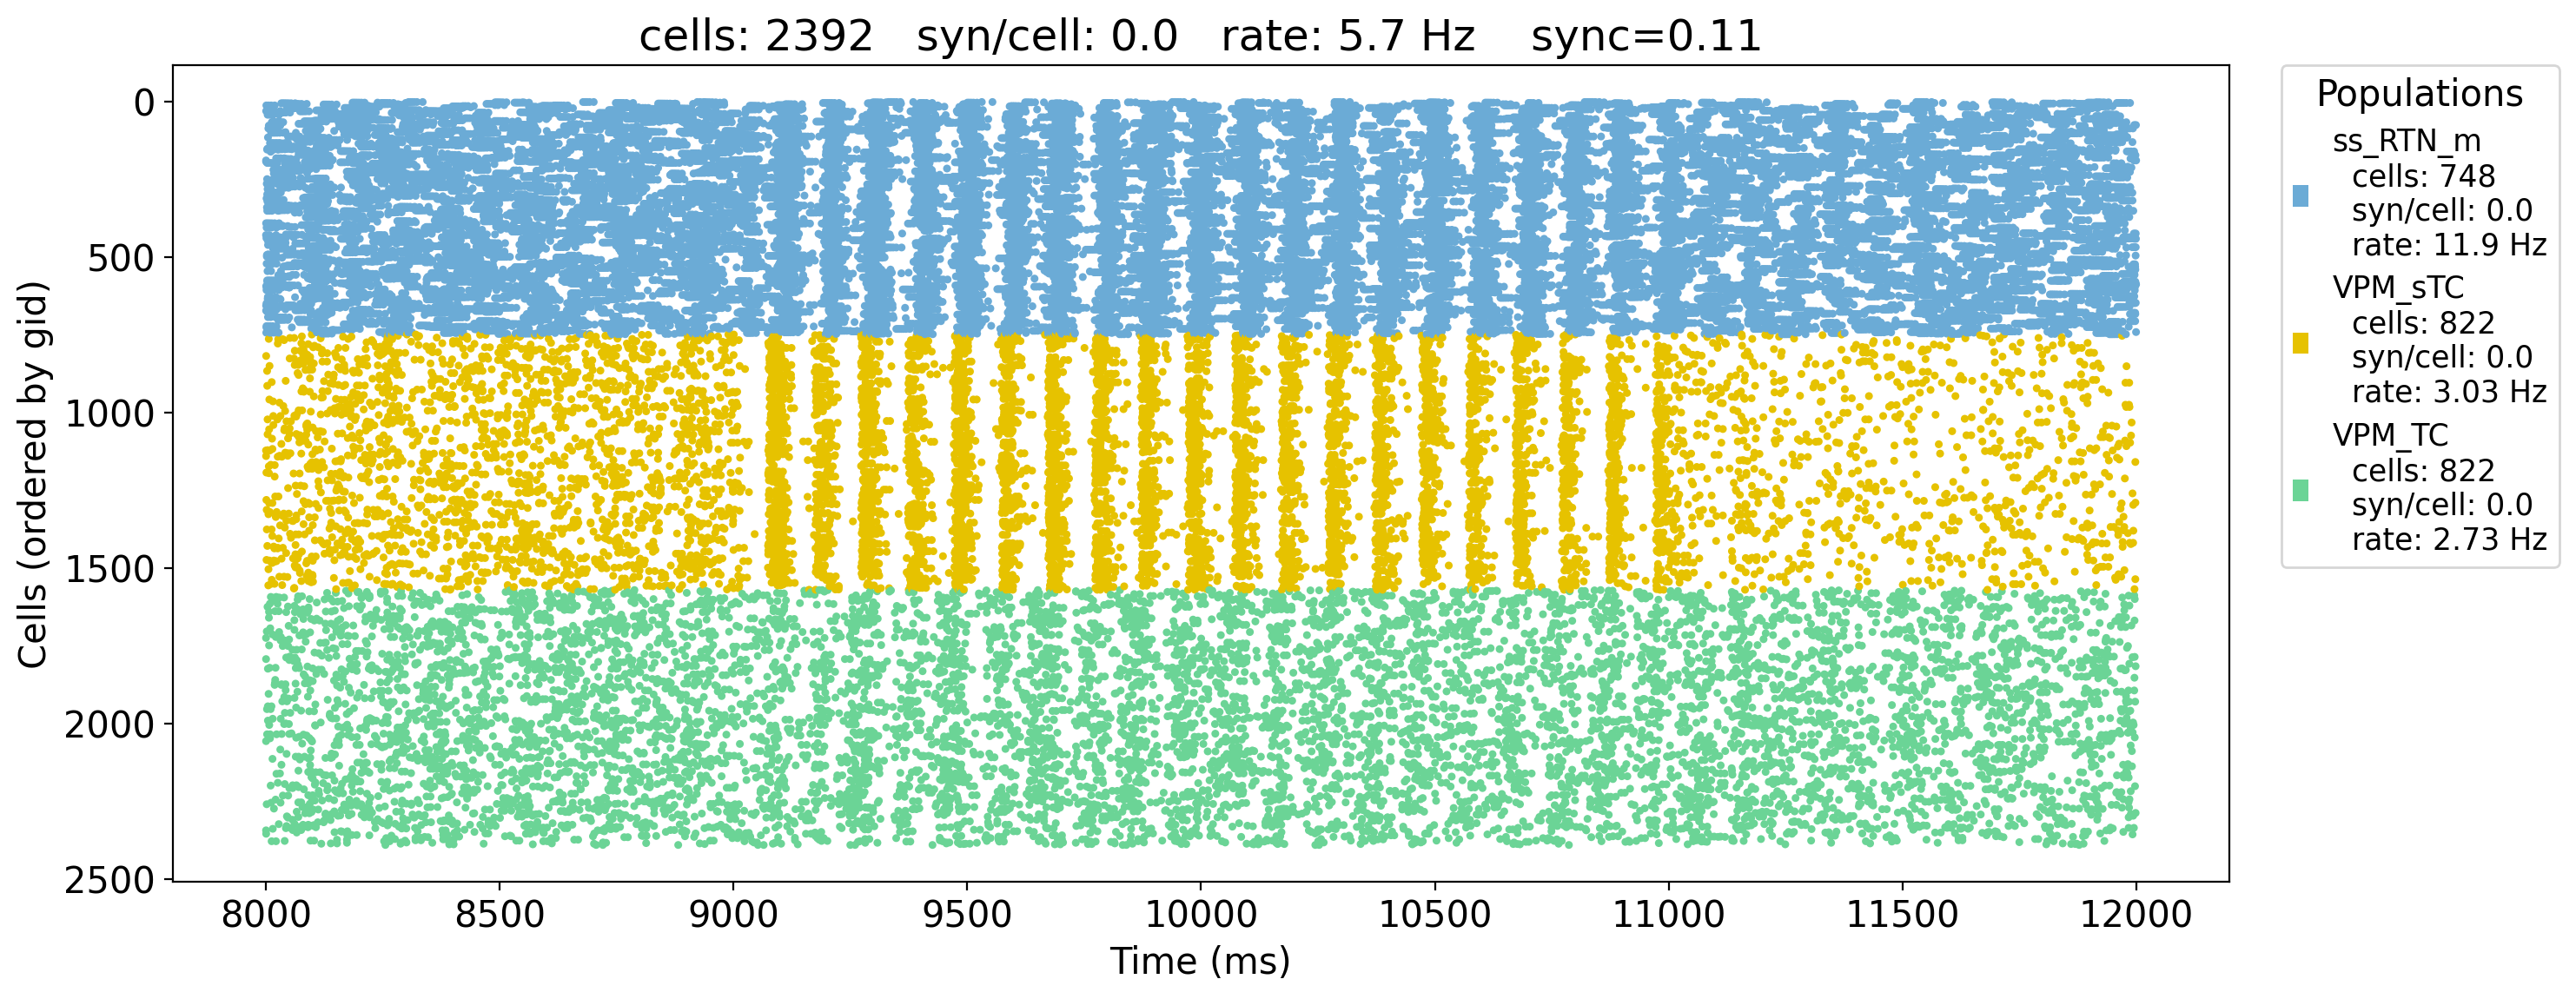

In [8]:
sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
                            'timeRange':timeRange, 'figSize': (15,6), 'fontSize':8, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
# plt.xlim(8500,11500)
# plt.xlabel('Time (s)')
# plt.xticks(np.linspace(500,8500,7),np.linspace(-0.5,2.5,7));


Preparing spike data...
Plotting raster...


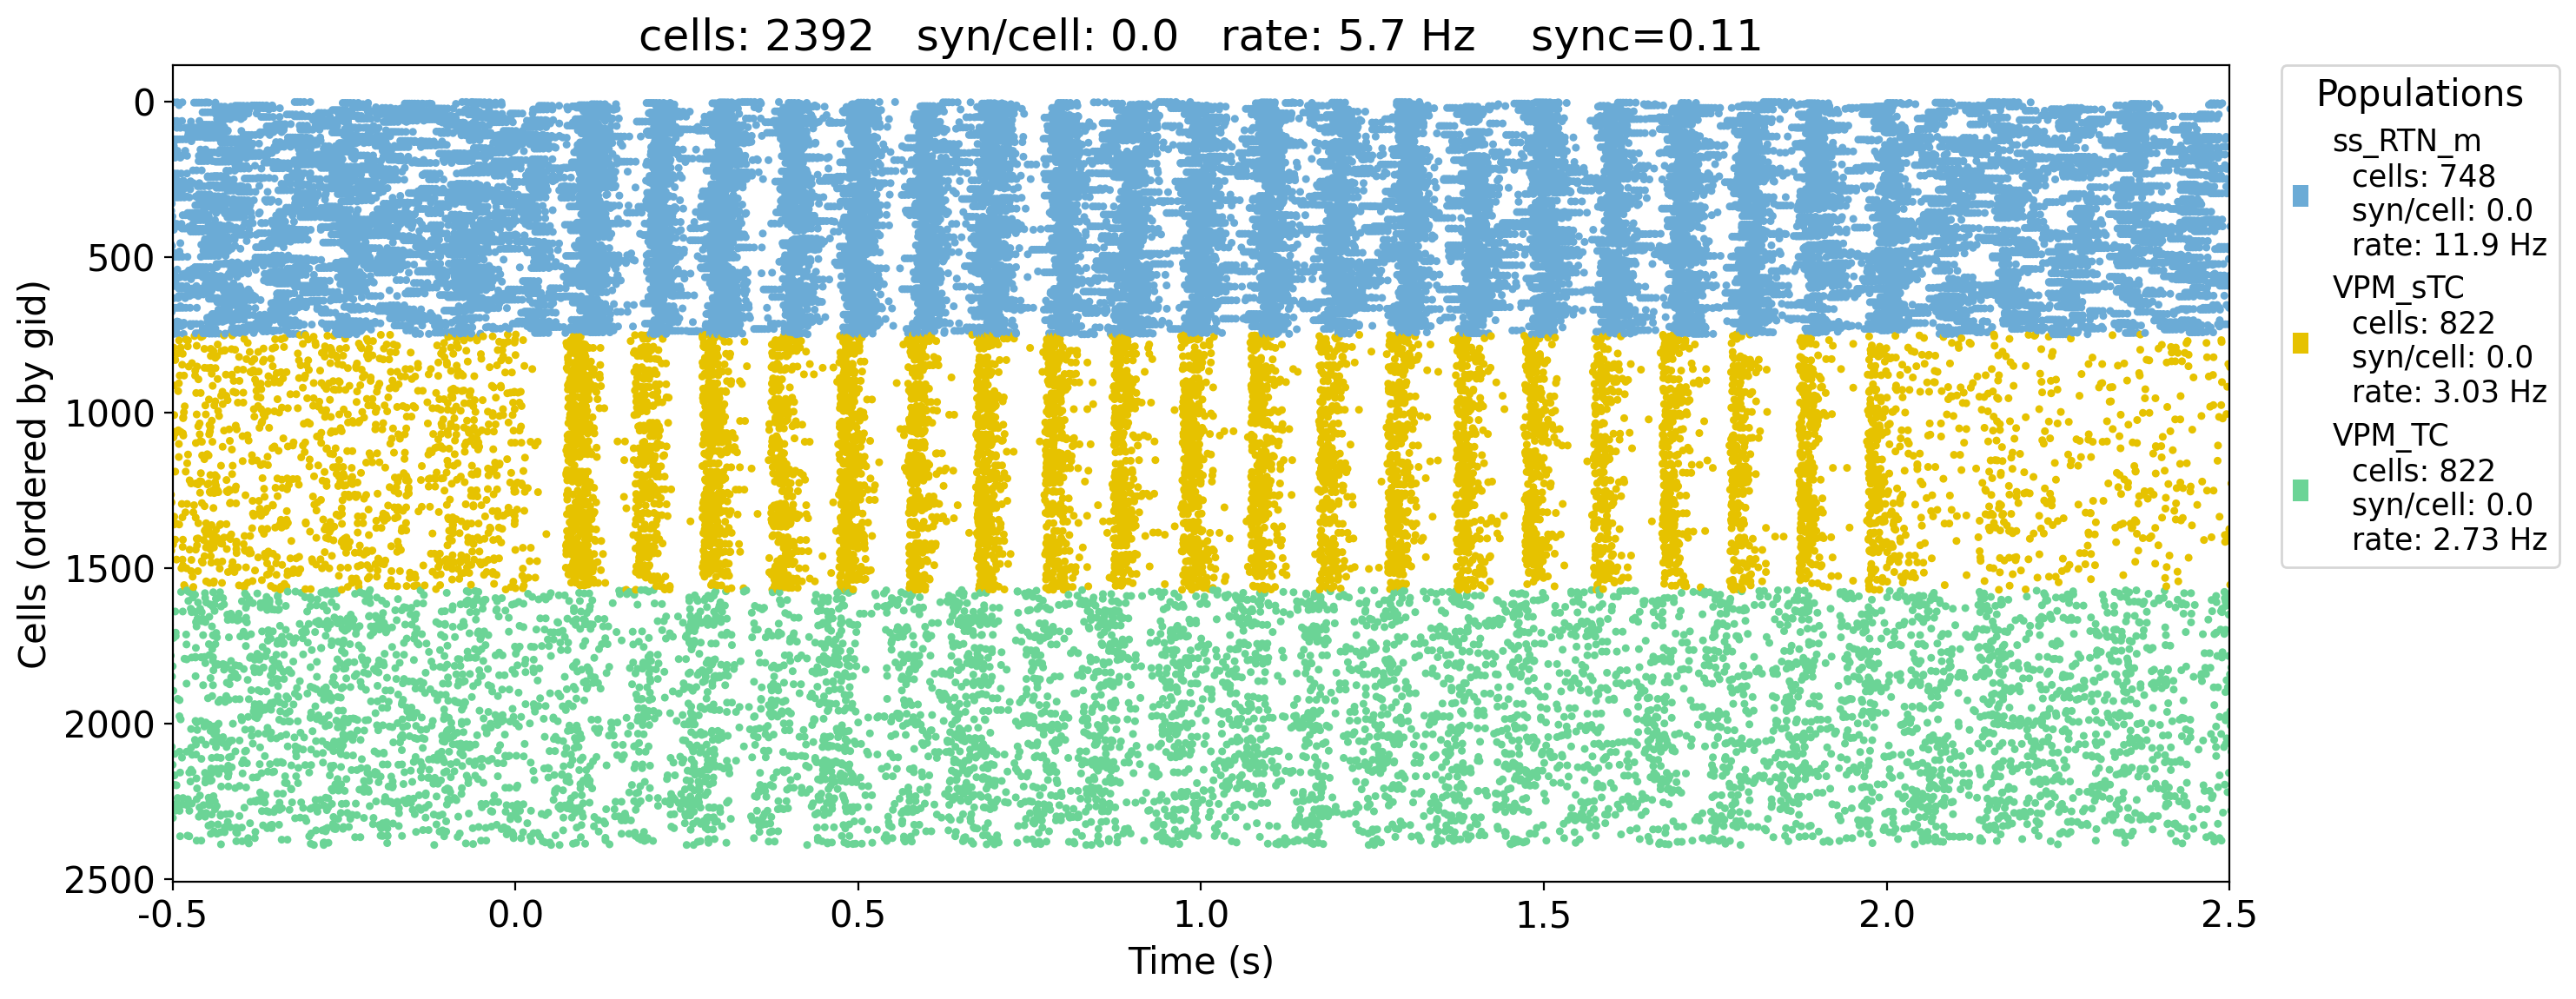

In [9]:
sim.analysis.plotRaster(**{'include': ['VPM_TC','ss_RTN_m','VPM_sTC'], 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
                            'timeRange': timeRange, 'figSize': (15,6), 'fontSize':8, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})
plt.xlim(8500,11500)
plt.xlabel('Time (s)')
plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));


Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... trace
Plotting recorded cell traces ... trace


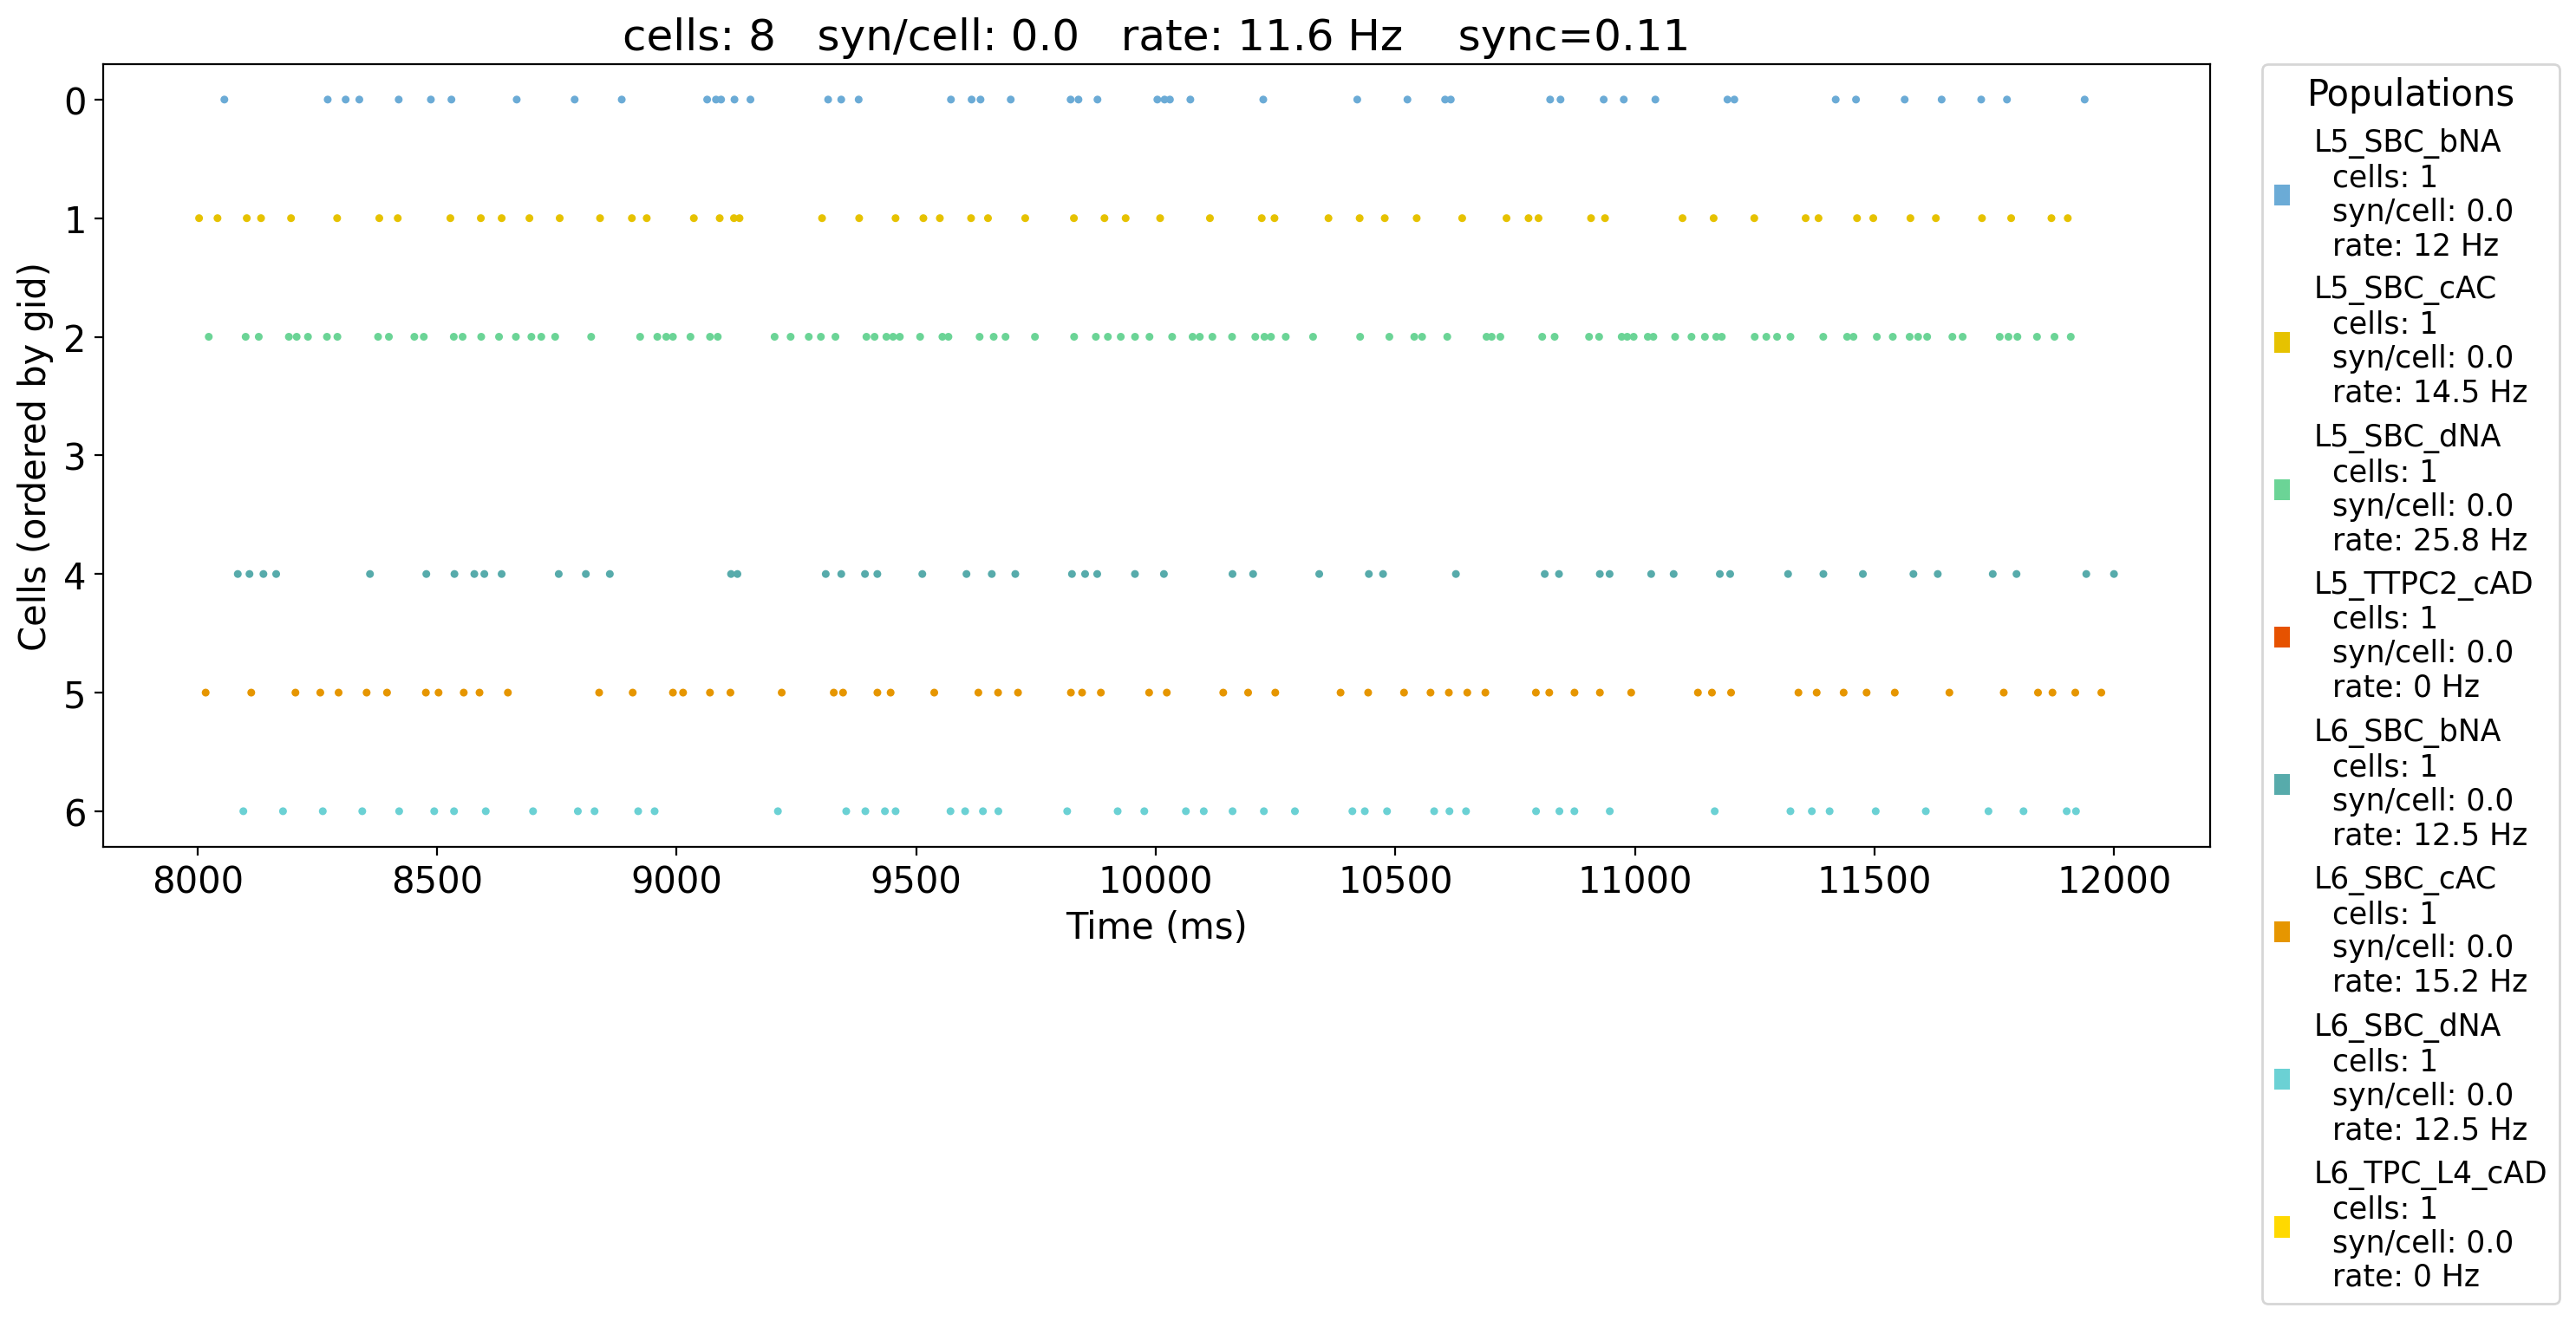

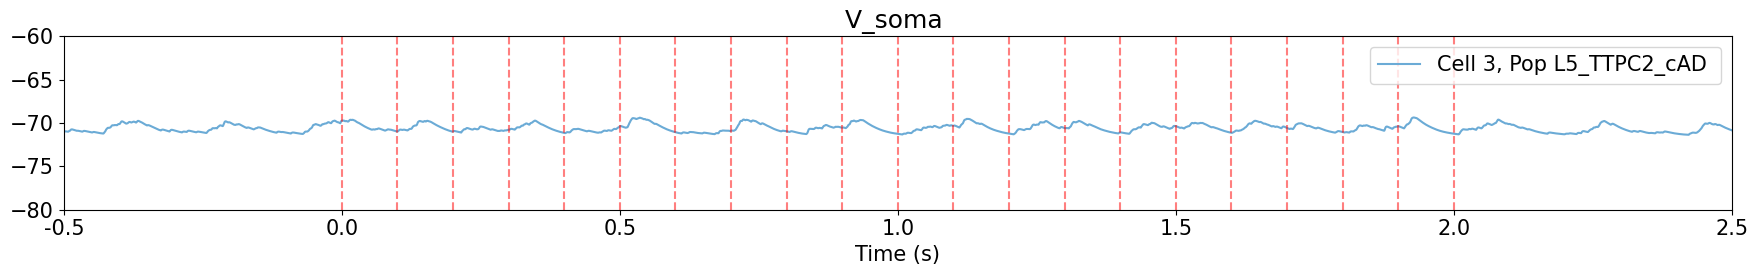

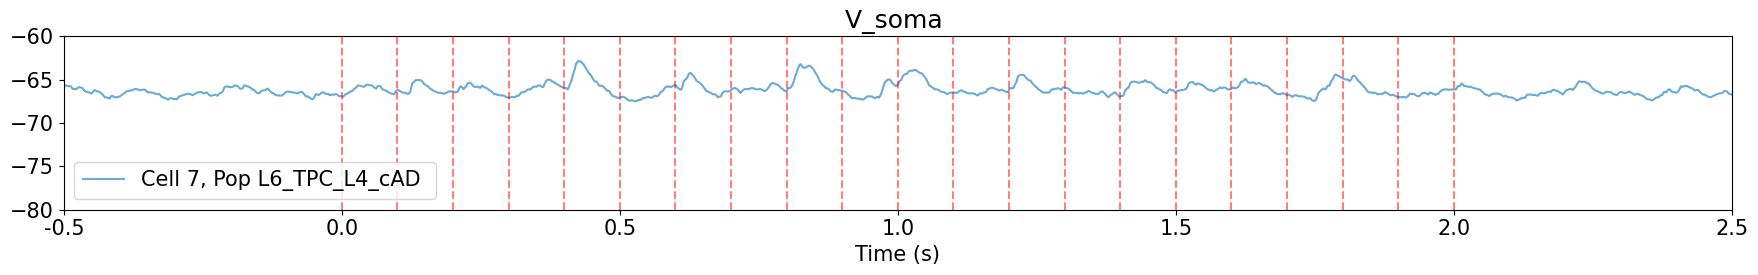

In [10]:
timeRange = [8000,12000]
# 'presyn_VPL_sTC', 'presyn_VPM_sTC', 'presyn_POm_sTC_s1'
sim.analysis.plotRaster(**{'include': sim.cfg.S1cells, 'saveFig': False, 'showFig': False, 'popRates': True,'orderInverse': True, 
                           'timeRange': timeRange, 'figSize': (15,7), 'fontSize':4, 'lw': 1, 'markerSize':1, 'marker': 'o', 'dpi': 200})

for pop in sim.cfg.S1cells:
    if 'TPC' in pop:
        sim.analysis.plotTraces(include= [pop], timeRange=timeRange, overlay=True, oneFigPer='trace', ylim=[-80,-60], subtitles= True, axis=True, scaleBarLoc=1, 
                            figSize=(18, 3), fontSize=15, showFig=False, saveFig=False);
        plt.xlim(8500,11500)
        plt.xlabel('Time (s)')
        plt.vlines(np.linspace(9000,11000,21), ymin=-80,ymax = -60, color='red',linestyles='dashed', alpha =0.5)
        plt.xticks(np.linspace(8500,11500,7),np.linspace(-0.5,2.5,7));

Preparing spike data...
Plotting spike frequency...


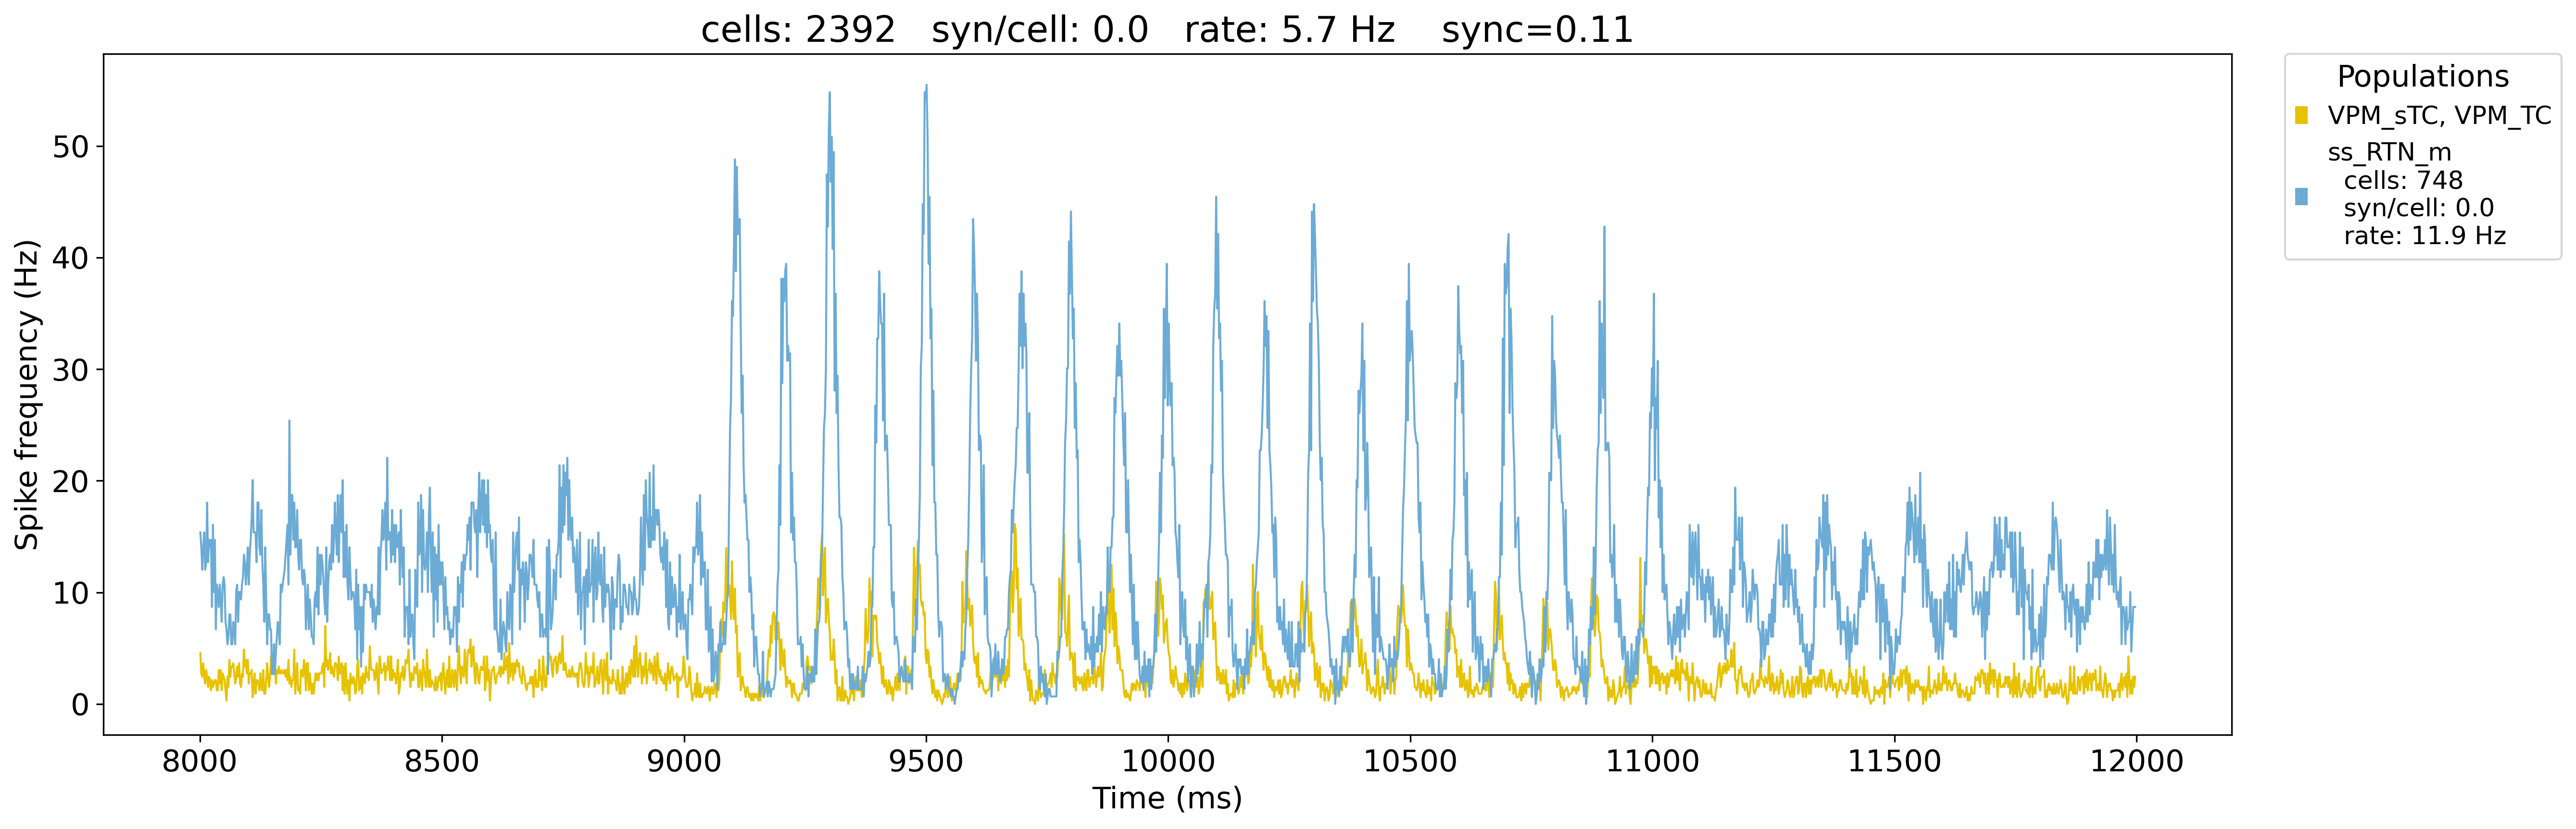

In [11]:
sim.analysis.plotSpikeHist(include=[['VPM_sTC', 'VPM_TC'],'ss_RTN_m'], binSize=2, figSize=(18, 6.0), fontSize = 12, legend=False, showFig= False,
                                    timeRange = timeRange, graphType = 'bar', measure = 'rate', linewidth=5, dpi=300, saveData=False, saveFig=False);

In [12]:
sim.simData['LFP'][-1]

array([0., 0.])

Preparing LFP data...
Plotting LFP time series...


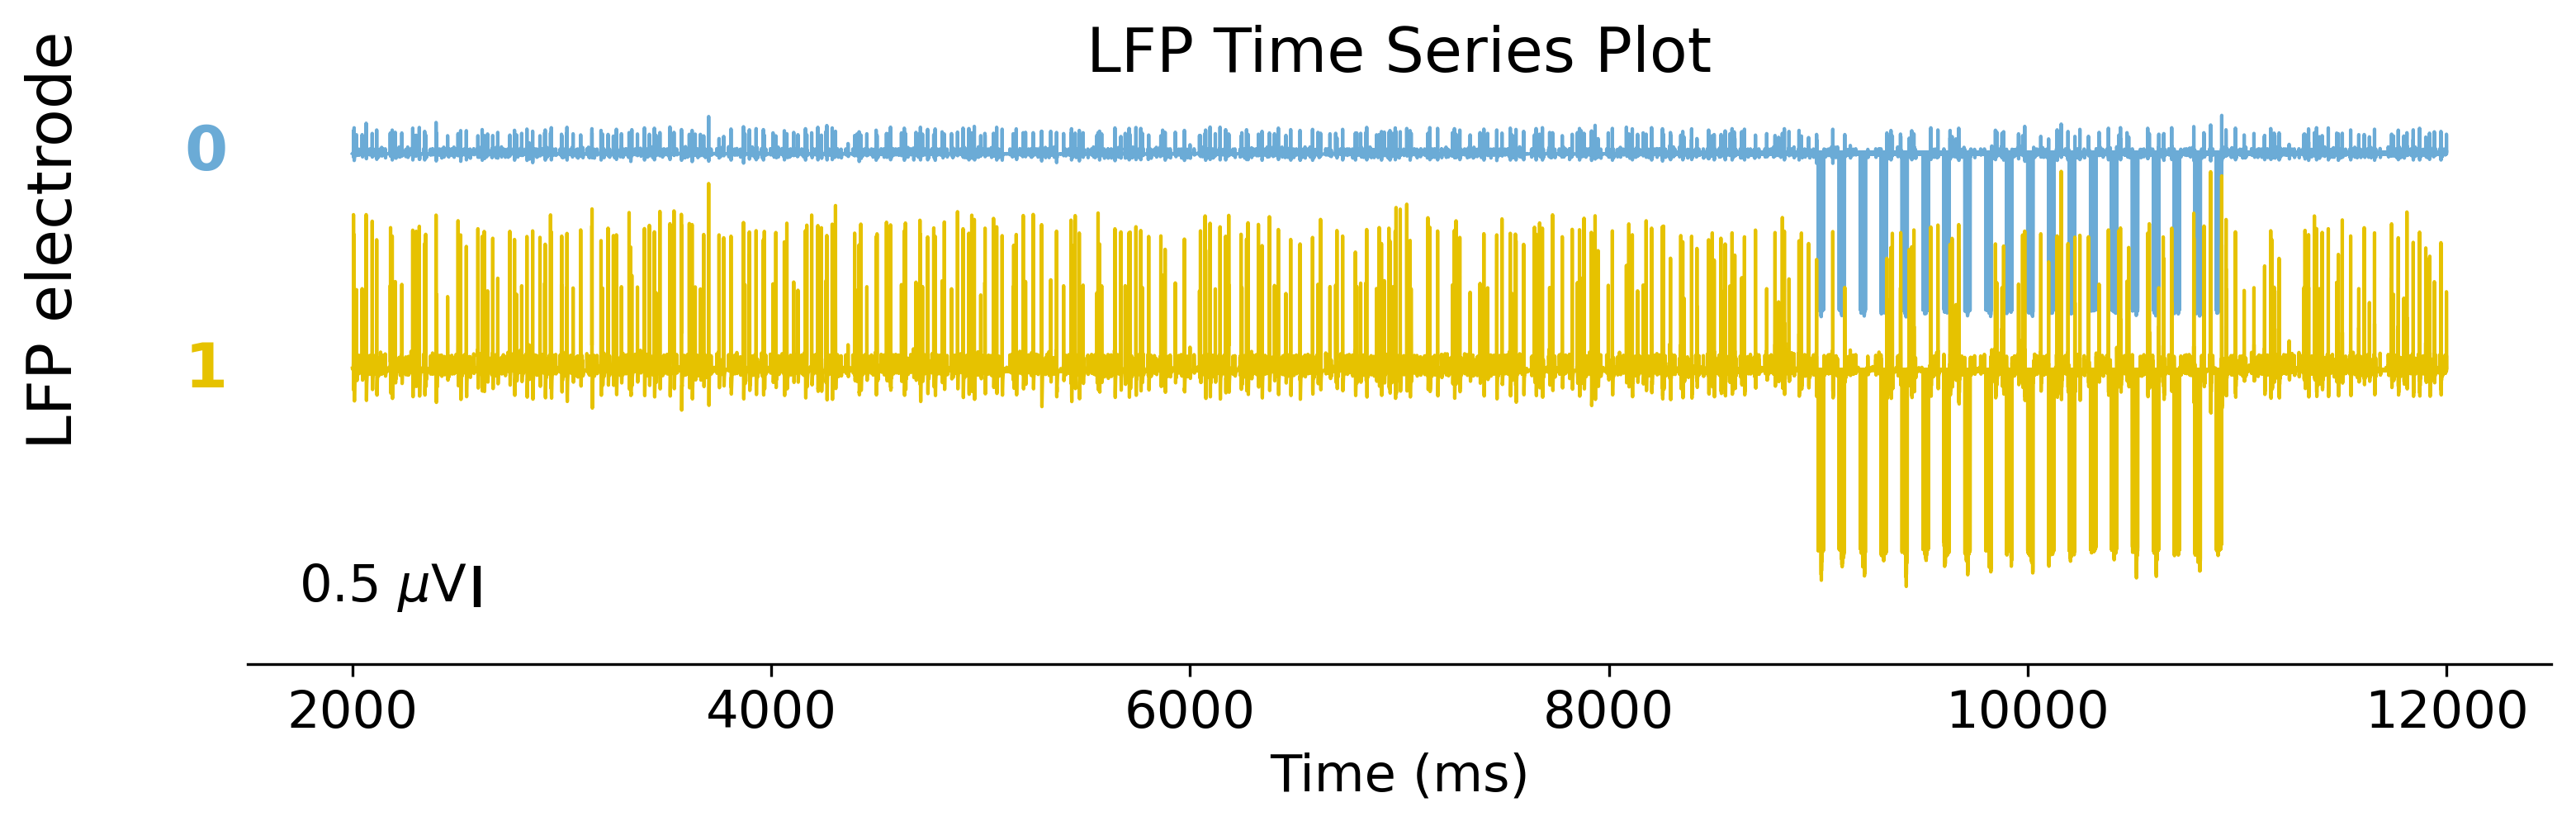

In [17]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'],
                'electrodes': [0, 1], 'lineWidth': 8, 
                # 'filtFreq': [200,400], 'filtOrder': 5,
                # 'timeRange': [6040,6080], 
                'timeRange': [2000,12000], 'dpi':300,
        'figSize': (12.0,3), 'saveFig': "LFPTimeSeries.png", 'showFig': False})
# sim.analysis.plotLFP(**{'plots': ['timeSeries'],
#                 'electrodes': [0, 1], 'lineWidth': 8, 
#                 'filtFreq': [2,40], 'filtOrder': 2,
#                 # 'timeRange': [6040,6080], 
#                 'timeRange': [8000,10000], 'dpi':300,
#         'figSize': (12.0,3), 'saveFig': "LFPTimeSeries.png", 'showFig': False})

In [14]:
np.shape(sim.simData['LFP'])

(120000, 2)